# Setup

In [10]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
df = pd.read_csv("../Datasets/indeed_job_dataset.csv")
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [37]:
df = df[['Job_Title', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry']]

# Graph Function

<IPython.core.display.Javascript object>


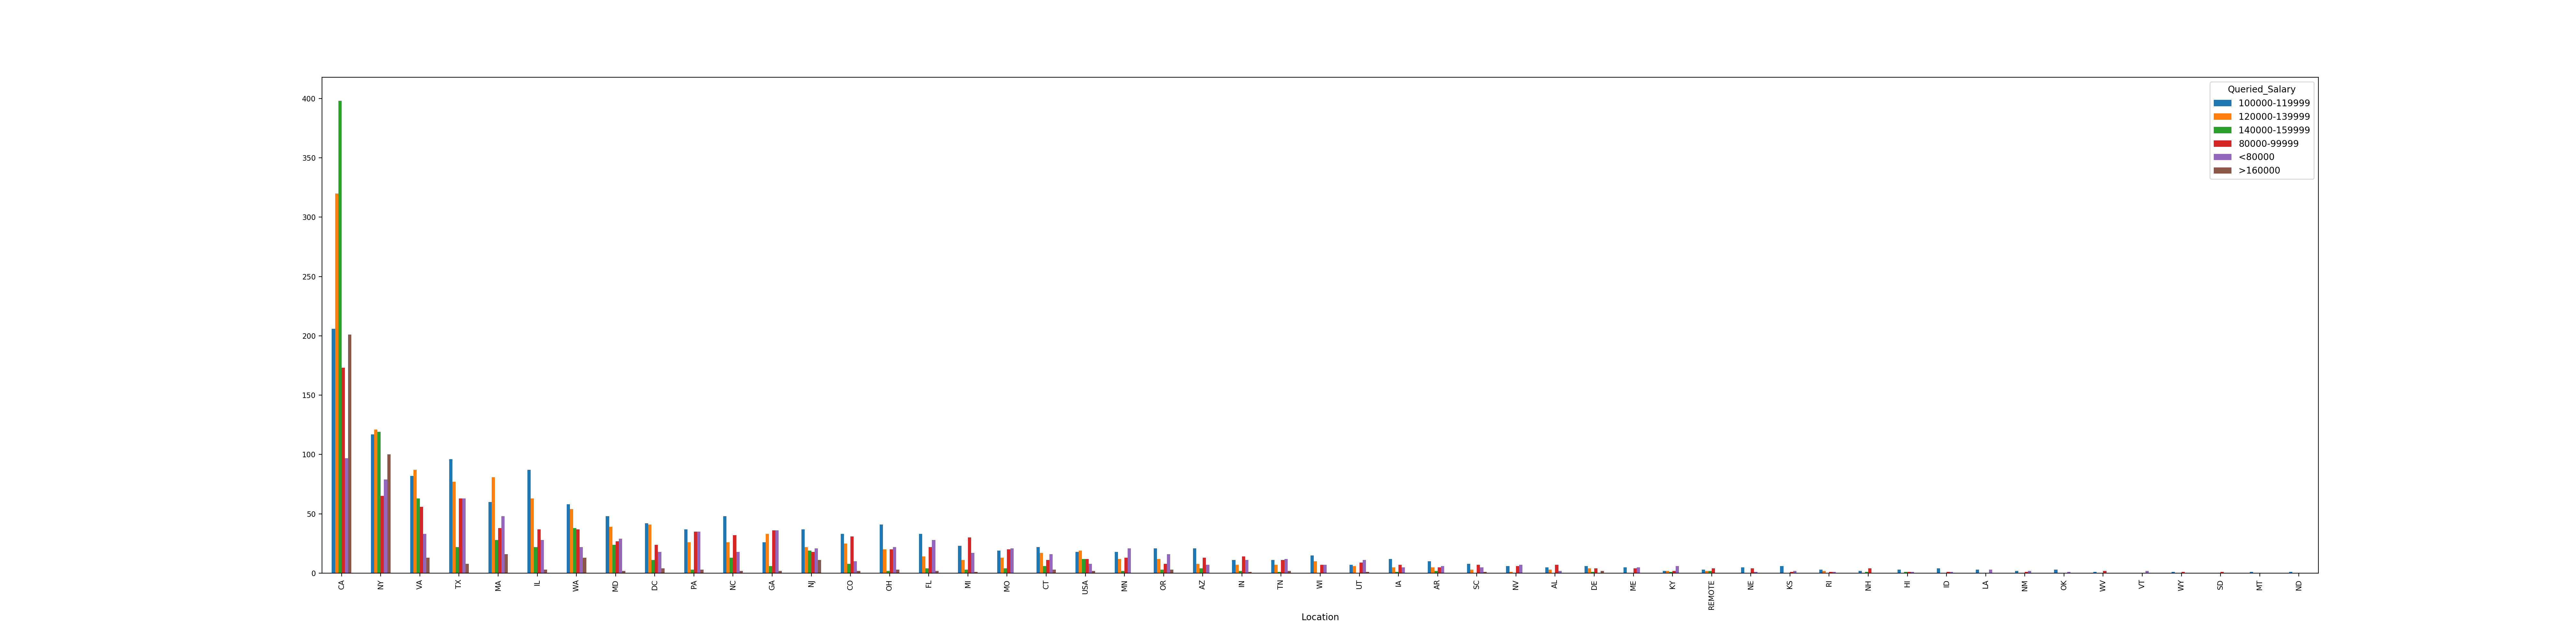

In [54]:
def Industrygraph(data,param1,param2):
    df = pd.DataFrame(data.groupby([param1])[param2].value_counts())
    df.columns = [f"{param2} Count"]
    df = df.reset_index().set_index(param1).pivot(columns = param2, values = f"{param2} Count").fillna(0)
    df["Total"] = 0
    for column in df.columns:
        df["Total"] = df["Total"] + df[column]
    df = df.sort_values("Total", ascending = False)
    df = df.drop("Total", 1)
    df.plot.bar(figsize = (40, 10), rot = 90, fontsize = 8)
    plt.savefig(f"Bar Graphs/{param1} vs {param2} Bar Graph.png")
    
    '''
    
    
    '''
    
Industrygraph(df,"Location","Queried_Salary")


# Salaries by Industry Graph

In [28]:
df1 = df.loc[df["Job_Type"] == "data_engineer"]
df1.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry
4336,Geospatial Data Engineer,<80000,data_engineer,"['ArcGIS', 'Shell Scripting', 'GIS', 'Python',...",5,GlassDoor,10078.0,4.0,1.0,[<p>Produce and process chart and map source v...,FL,$5B to $10B (USD),"10,000+","Restaurants, Travel and Leisure"
4337,"Data Engineer, Baseball Operations",<80000,data_engineer,"['T-SQL', 'R', 'SQL']",3,New York Yankees,53.0,4.3,30.0,"[<ul>\r\r\n<li>Prepare, clean, format analytic...",NY,Less than $1B (USD),"Less than 10,000","Restaurants, Travel and Leisure"
4338,Data Engineer,<80000,data_engineer,"['R', 'SQL']",2,W.R. Berkley,11.0,3.5,4.0,[<p><b>Berkley Technology Services</b> (BTS) i...,IA,Less than $1B (USD),"Less than 10,000",Insurance
4339,Junior Data Engineer,<80000,data_engineer,"['T-SQL', 'MongoDB', 'Microsoft SQL Server', '...",9,EducationDynamics,21.0,3.8,1.0,"[<ul>\r\r\n<li>Create, maintain and modify dyn...",NJ,NaN,NaN,Education and Schools
4340,Entry Level Data Engineer,<80000,data_engineer,"['Machine Learning', 'Java', 'Python']",3,FIS,1447.0,3.5,19.0,[<ul><li>Works with Senior Analysts to build d...,WI,$5B to $10B (USD),"10,000+",Banks and Financial Services


In [29]:
industry = df1.groupby(["Company_Industry"])["Queried_Salary"].value_counts()
industry = pd.DataFrame(industry)
industry.columns = ["Job_Count"]
industry.head(15)

Job_Count
Company_Industry             Queried_Salary           
Aerospace and Defense        120000-139999           7
                             140000-159999           6
                             100000-119999           5
                             80000-99999             2
                             <80000                  1
                             >160000                 1
Agriculture and Extraction   100000-119999           2
                             120000-139999           2
Auto                         120000-139999           5
                             100000-119999           3
                             140000-159999           3
                             <80000                  1
Banks and Financial Services 120000-139999          45
                             100000-119999          36
                             140000-159999          31

In [30]:
industry = industry.reset_index().set_index("Company_Industry").pivot(columns = "Queried_Salary", values = "Job_Count").fillna(0)
industry.head()

Queried_Salary,100000-119999,120000-139999,140000-159999,80000-99999,<80000,>160000
Company_Industry,,,,,,
Aerospace and Defense,5.0,7.0,6.0,2.0,1.0,1.0
Agriculture and Extraction,2.0,2.0,0.0,0.0,0.0,0.0
Auto,3.0,5.0,3.0,0.0,1.0,0.0
Banks and Financial Services,36.0,45.0,31.0,15.0,3.0,11.0
Computers and Electronics,4.0,12.0,2.0,2.0,0.0,2.0


In [31]:
industry["Total Jobs"] = industry["100000-119999"] + industry["120000-139999"] + industry["140000-159999"] + industry["80000-99999"]\
+ industry["<80000"] + industry[">160000"]
industry.head()


Queried_Salary,100000-119999,120000-139999,140000-159999,80000-99999,<80000,>160000,Total Jobs
Company_Industry,,,,,,,
Aerospace and Defense,5.0,7.0,6.0,2.0,1.0,1.0,22.0
Agriculture and Extraction,2.0,2.0,0.0,0.0,0.0,0.0,4.0
Auto,3.0,5.0,3.0,0.0,1.0,0.0,12.0
Banks and Financial Services,36.0,45.0,31.0,15.0,3.0,11.0,141.0
Computers and Electronics,4.0,12.0,2.0,2.0,0.0,2.0,22.0


In [32]:
industry = industry.sort_values("Total Jobs", ascending = False)
industry = industry[[">160000","140000-159999","120000-139999","100000-119999","80000-99999","<80000"]]
industry.head(15)

Queried_Salary,>160000,140000-159999,120000-139999,100000-119999,80000-99999,<80000
Company_Industry,,,,,,
Consulting and Business Services,22.0,30.0,47.0,59.0,9.0,1.0
Internet and Software,12.0,43.0,56.0,32.0,6.0,0.0
Banks and Financial Services,11.0,31.0,45.0,36.0,15.0,3.0
Insurance,2.0,6.0,17.0,36.0,5.0,1.0
Health Care,1.0,5.0,19.0,21.0,9.0,6.0
Industrial Manufacturing,0.0,2.0,17.0,13.0,1.0,0.0
Human Resources and Staffing,16.0,6.0,5.0,4.0,0.0,1.0
"Media, News and Publishing",3.0,7.0,13.0,6.0,1.0,0.0
Retail,1.0,8.0,7.0,8.0,2.0,0.0


<IPython.core.display.Javascript object>


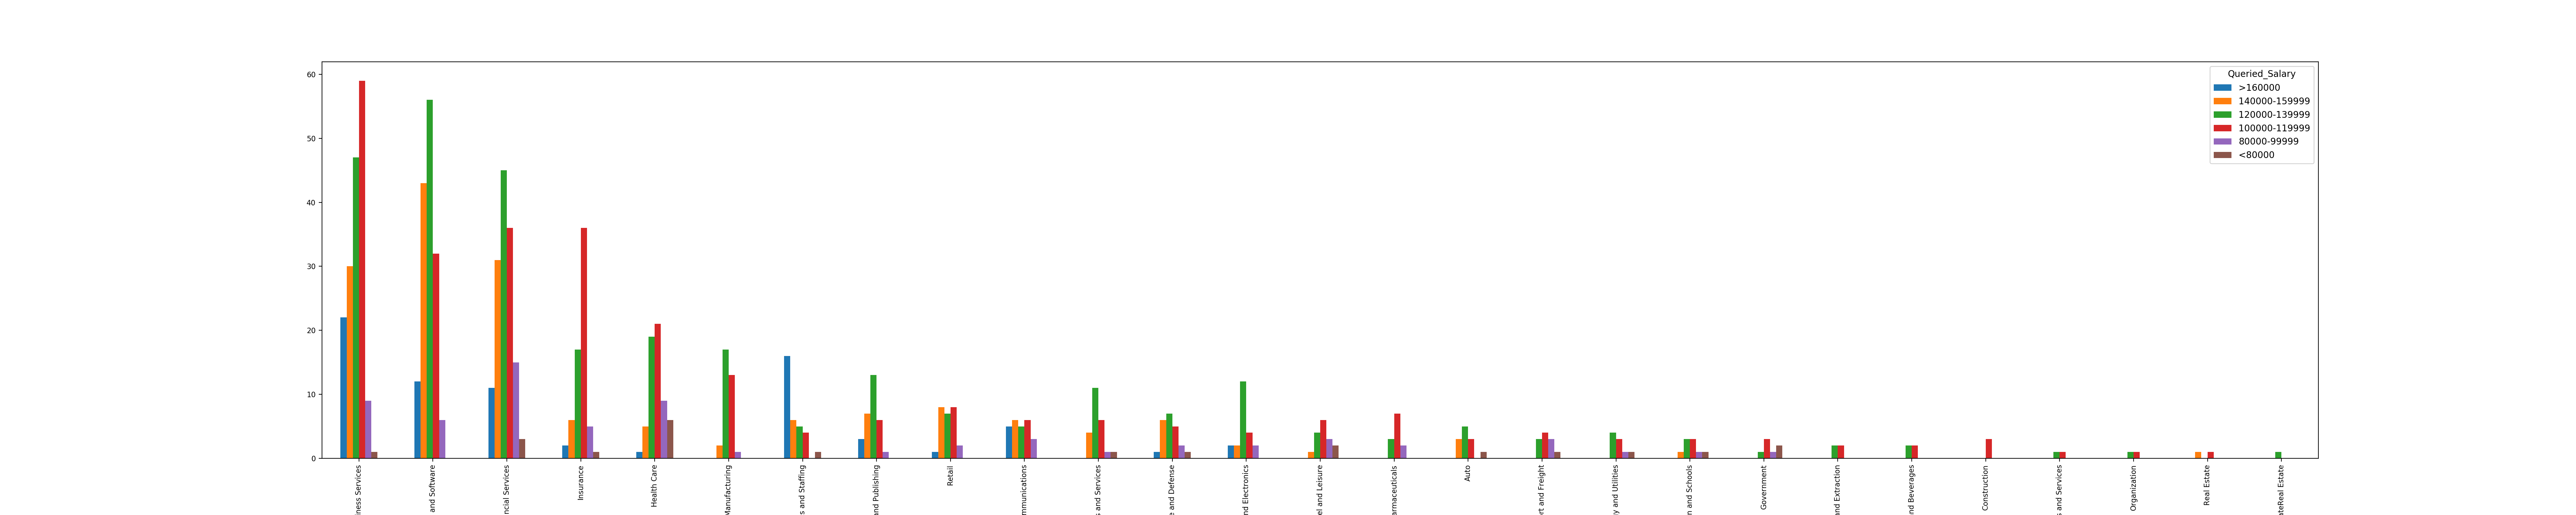

In [33]:
industry.plot.bar(figsize = (40, 8), rot = 90, fontsize = 8, )

In [34]:
plt.savefig("Salary Engineer BarChart.png")

In [ ]:
df_sci = df.loc[df["Job_Type"] == "data_scientist",:]["No_of_Skills"]
df_ana = df.loc[df["Job_Type"] == "data_engineer",:]["No_of_Skills"]
stats.ttest_ind(df_sci, df_ana, equal_var=False)

# Company Merge

In [54]:
df_comp = pd.read_csv("../Datasets/Fortune 500 Companies US.csv", encoding = 'utf-8')
df_comp.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 4: invalid continuation byte

In [ ]:
df_test = df[["Job_Type", "Location"]]
df_test.head()

In [ ]:
df1 = df_test.loc[df["Job_Type"] == "data_scientist",:]
df1 = df1.fillna("Not Reported")
df1["Location"].value_counts()